# **Day 3 - Polygons**

Data Source: [KOSIS](https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Flist_id%3DA1_13%26obj_var_id%3D%26seqNo%3D%26tblId%3DDT_1B08024%26vw_cd%3DMT_ETITLE%26language%3Den%26orgId%3D101%26path%3D%252Feng%252FstatisticsList%252FstatisticsListIndex.do%26conn_path%3DMT_ETITLE%26itm_id%3D%26lang_mode%3Den%26scrId%3D%26)

## Setup

In [ ]:
!pip install geopandas requests matplotlib pandas

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests, zipfile, io
import matplotlib.colors as mcolors

## Data

In [ ]:
# south korea boundaries
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_KOR_shp.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("gadm_kor")

In [ ]:
# provinces
sk = gpd.read_file("gadm_kor/gadm41_KOR_1.shp")
sk = sk.to_crs(4326)

In [ ]:
print(sk["NAME_1"].unique())

['Busan' 'Chungcheongbuk-do' 'Chungcheongnam-do' 'Daegu' 'Daejeon'
 'Gangwon-do' 'Gwangju' 'Gyeonggi-do' 'Gyeongsangbuk-do'
 'Gyeongsangnam-do' 'Incheon' 'Jeju' 'Jeollabuk-do' 'Jeollanam-do'
 'Sejong' 'Seoul' 'Ulsan']


In [ ]:
data = {
    "name": [
        "Seoul", "Busan", "Daegu", "Incheon", "Gwangju", "Daejeon", "Ulsan",
        "Sejong-si", "Gyeonggi-do", "Gangwon-State", "Chungcheongbuk-do",
        "Chungcheongnam-do", "Jeonbuk-State", "Jeollanam-do",
        "Gyeongsangbuk-do", "Gyeongsangnam-do", "Jeju-do"
    ],
    "density_2024": [
        15425.0, 4222.9, 1580.1, 2859.3, 2882.8, 2718.1, 1041.4,
        839.0, 1364.0, 90.5, 222.3, 271.4, 217.8, 143.8,
        139.9, 309.6, 364.7
    ]
}

df = pd.DataFrame(data)

In [ ]:
mapping = {
    "Seoul": "Seoul",
    "Busan": "Busan",
    "Daegu": "Daegu",
    "Incheon": "Incheon",
    "Gwangju": "Gwangju",
    "Daejeon": "Daejeon",
    "Ulsan": "Ulsan",
    "Sejong-si": "Sejong",
    "Gyeonggi-do": "Gyeonggi-do",
    "Gangwon-State": "Gangwon-do",
    "Chungcheongbuk-do": "Chungcheongbuk-do",
    "Chungcheongnam-do": "Chungcheongnam-do",
    "Jeonbuk-State": "Jeollabuk-do",
    "Jeollanam-do": "Jeollanam-do",
    "Gyeongsangbuk-do": "Gyeongsangbuk-do",
    "Gyeongsangnam-do": "Gyeongsangnam-do",
    "Jeju-do": "Jeju"
}

df["gadm_name"] = df["name"].map(mapping)
merged = sk.merge(df, left_on="NAME_1", right_on="gadm_name", how="left")

## Visualize

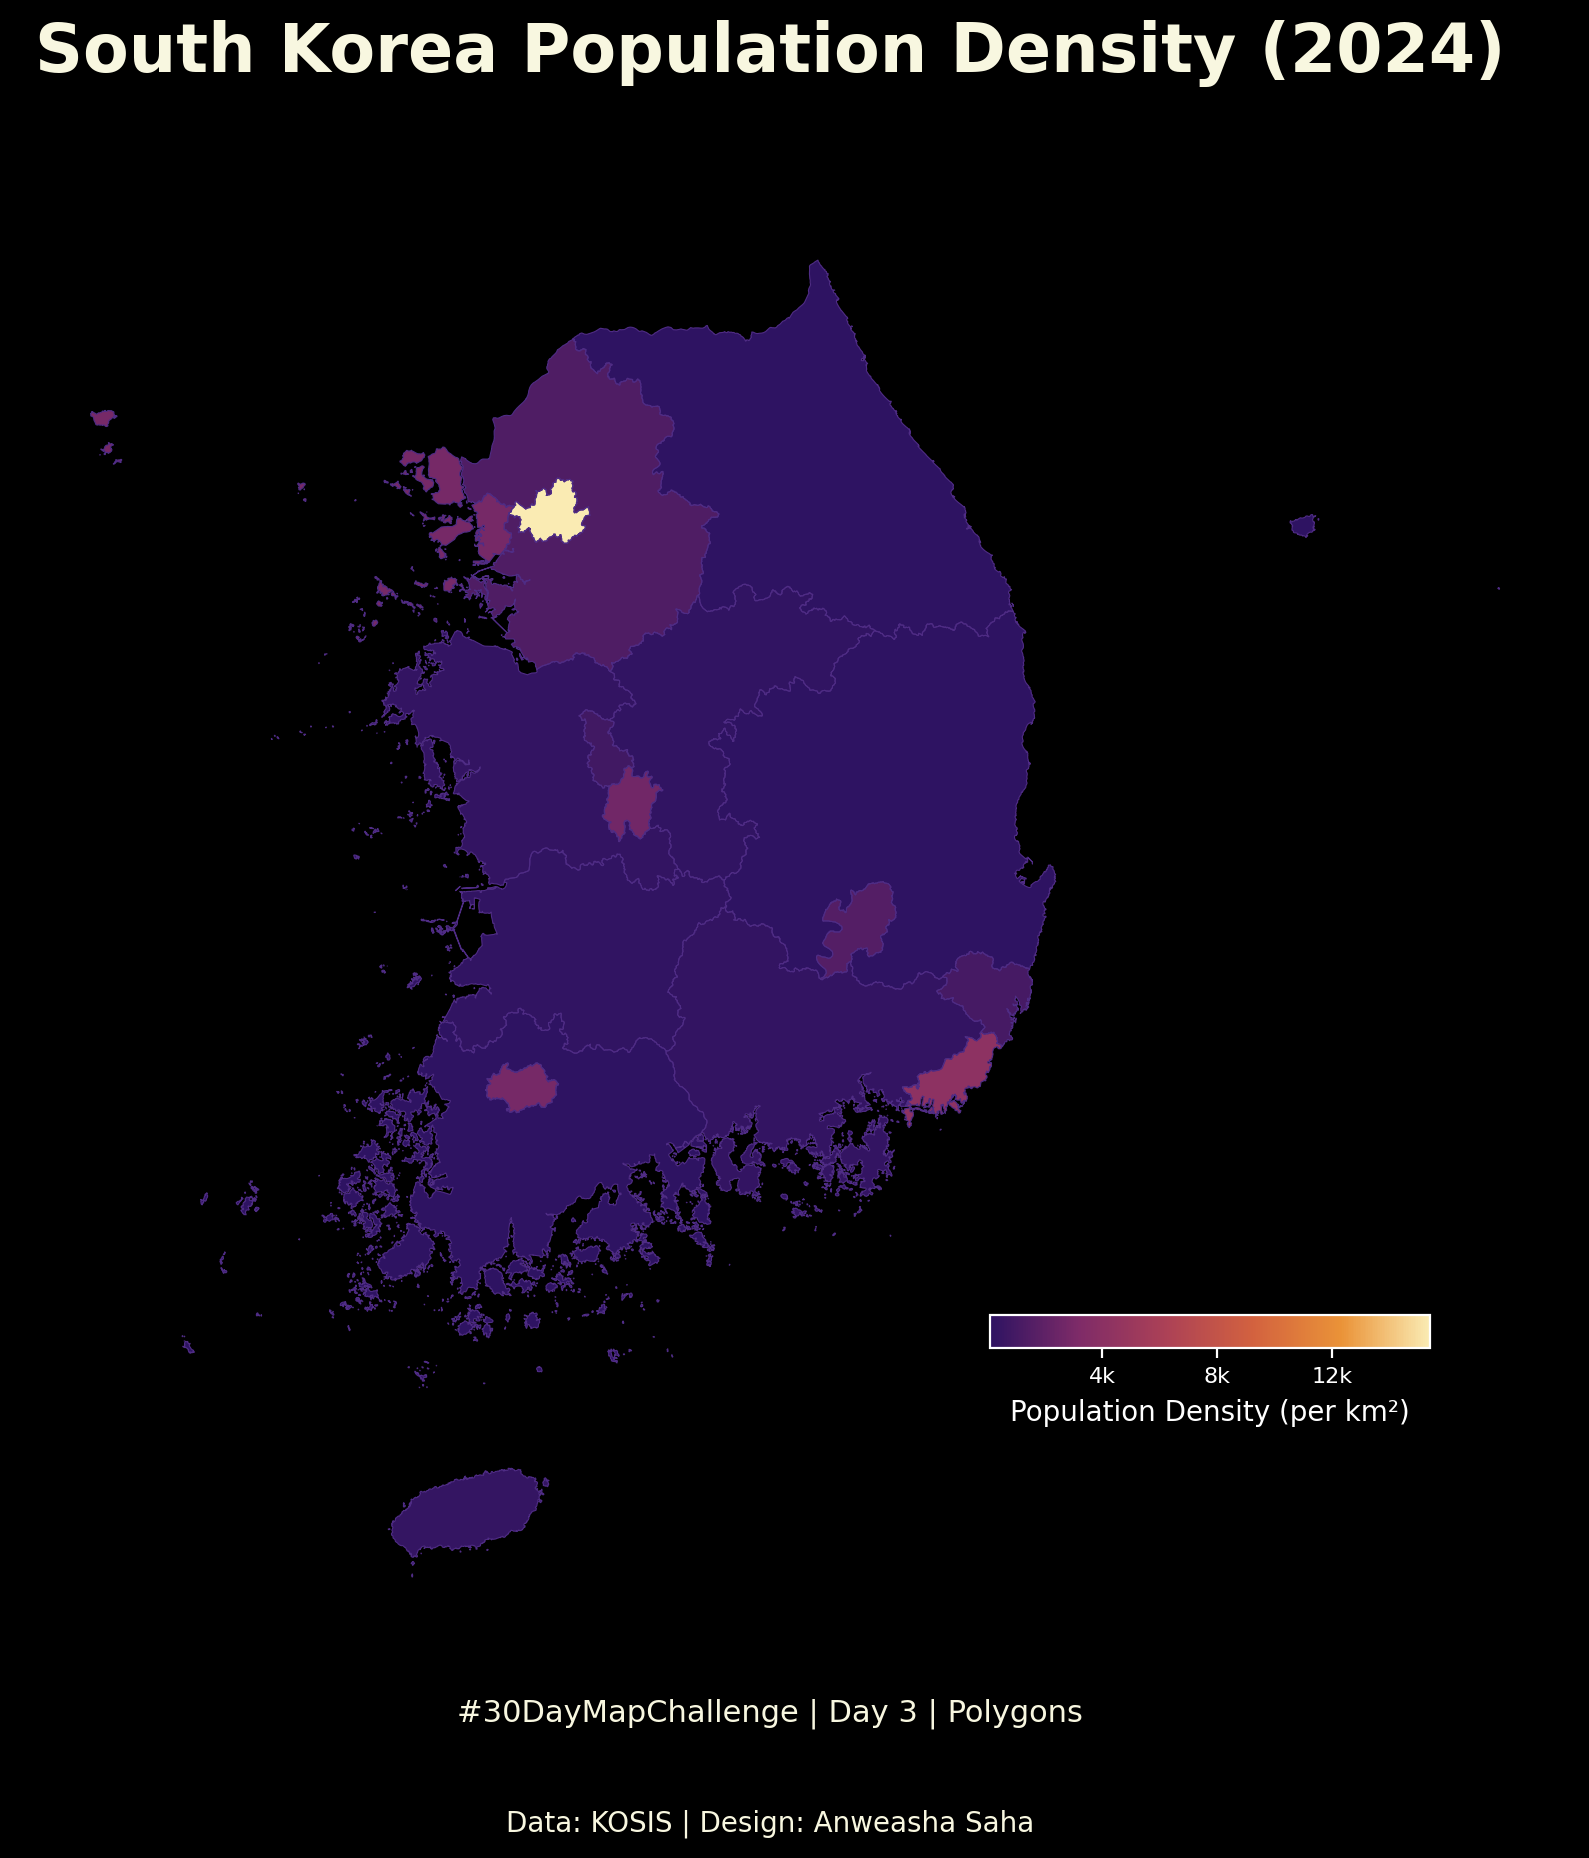

In [ ]:
mid_colors = ["#7E2B68", "#AC4156", "#D3623F", "#EA9338"]

start_color = "#2E1362"
end_color   = "#FAEBB3"

full_colors = [start_color] + mid_colors + [end_color]

custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_pop", full_colors)

fig, ax = plt.subplots(figsize=(10, 11), dpi=200)

#background
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

# map
merged.plot(column="density_2024", cmap=custom_cmap, linewidth=0, ax=ax, zorder=2, legend=False)
sk.boundary.plot(ax=ax, color="#4F2C85", linewidth=0.4, zorder=3)

sm = plt.cm.ScalarMappable(
    cmap=custom_cmap,
    norm=plt.Normalize(vmin=merged["density_2024"].min(), vmax=merged["density_2024"].max())
)
sm.set_array([])

cax = fig.add_axes([0.61, 0.30, 0.22, 0.015])
cbar = plt.colorbar(sm,cax=cax,orientation="horizontal")

cbar.ax.tick_params(labelsize=8, colors="white")
cbar.outline.set_edgecolor("white")
cbar.set_label("Population Density (per km²)", color="white", labelpad=4)

cbar.set_ticks([4000, 8000, 12000])
cbar.set_ticklabels(["4k", "8k", "12k"])
cbar.ax.tick_params(colors="white", labelsize=8)

fig.text(0.5, 0.88, "South Korea Population Density (2024)", ha="center", fontsize=24, fontweight="bold", color="#F8F7E0")

fig.text(0.5, 0.13, "#30DayMapChallenge | Day 3 | Polygons", fontsize=11, ha="center", color="#F8F7E0")

fig.text(0.5, 0.08,"Data: KOSIS | Design: Anweasha Saha", ha="center", fontsize=10, color="#F8F7E0")

ax.set_axis_off()
plt.show()